In [1]:
#Importing all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
data=pd.read_csv("student_depression_dataset.csv")
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [2]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [3]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
data["Work Pressure"].unique()

array([0., 5., 2.])

In [5]:
data["Job Satisfaction"].unique()

array([0., 3., 4., 2., 1.])

In [6]:
data.drop("id",axis=1,inplace=True)
data

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [7]:
data["Gender"]=data["Gender"].map({"Male":1,"Female":0})

In [8]:
print(data['Gender'].value_counts())
print(data[['Gender']].head())


Gender
1    15547
0    12354
Name: count, dtype: int64
   Gender
0       1
1       0
2       1
3       0
4       0


In [9]:
data["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [10]:
data.drop("City",axis=1,inplace=True)
data

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,0,24.0,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,1,31.0,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,0,28.0,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,0,25.0,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,1,27.0,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,1,31.0,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,0,18.0,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [11]:
data["Profession"].unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

In [12]:
data["Dietary Habits"].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [13]:
data["Degree"].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

In [14]:
data["Sleep Duration"].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

C:\Users\ganesh r. gawde\AppData\Local\Temp\ipykernel_36972\3842676745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="Depression", data=data, palette="Set2")


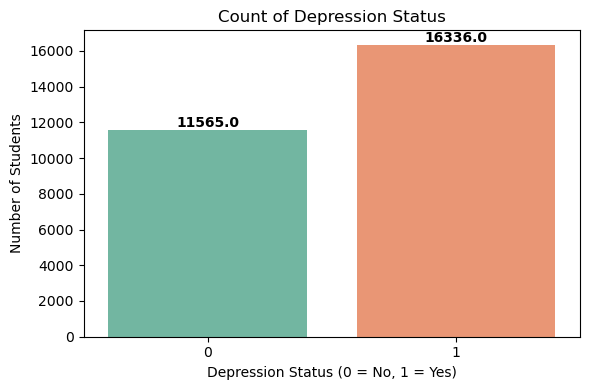

In [15]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x="Depression", data=data, palette="Set2")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1,f'{height}',ha="center", va="bottom", fontsize=10, fontweight="bold")

# Label axes and title
plt.xlabel("Depression Status (0 = No, 1 = Yes)")
plt.ylabel("Number of Students")
plt.title("Count of Depression Status")

# Tight layout and show
plt.tight_layout()
plt.show()

In [16]:
cat_cols = [...]  # list of column names (strings)
num_cols = [...]  # list of column names (strings)

In [17]:
# Wrong if 'Depressed' not found in df.columns
num_cols = data.select_dtypes(include=['int64','float64']).drop('Depression', axis=1).columns.tolist()

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

In [19]:
# After df = pd.read_csv(...)
target_col = 'Depression'
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
all_num = data.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [c for c in all_num if c != target_col]

print(cat_cols, num_cols)
assert cat_cols, "cat_cols is empty!"
assert num_cols, "num_cols is empty!"

['Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness'] ['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']


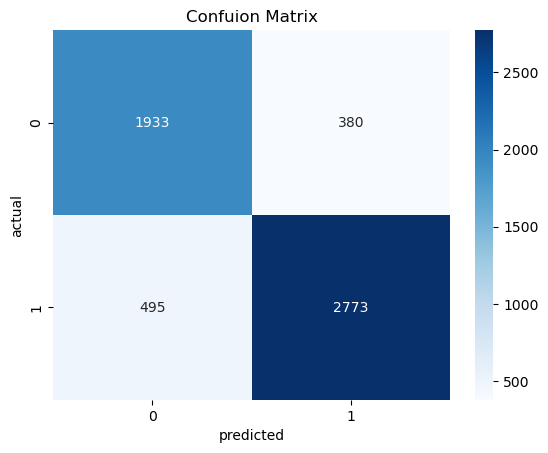

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2313
           1       0.88      0.85      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581

ROC AUC Score: 0.918


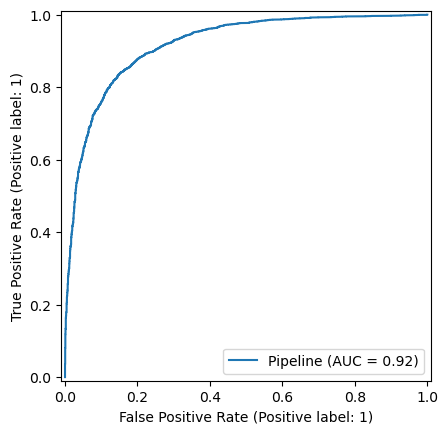

In [20]:
cat_cols = data.select_dtypes(include=["object"]).columns.tolist()
num_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols.remove("Depression")  # Remove the target column

preprocessor=ColumnTransformer(transformers=[("cat",OneHotEncoder(handle_unknown="ignore"),cat_cols),("num",StandardScaler(),num_cols)])

X=data.drop("Depression",axis=1)
y=data["Depression"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

    
model_pipeline=Pipeline(steps=[("prep",preprocessor),("clf",LogisticRegression(max_iter=1000,class_weight="balanced"))])
model_pipeline.fit(X_train,y_train)

#Predictions and Probabilities
y_pred=model_pipeline.predict(X_test)
y_proba=model_pipeline.predict_proba(X_test)[:,1]

#Confusion matrix
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM,annot=True,fmt="d",cmap="Blues")
plt.title("Confuion Matrix")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

#Classification Report
print(classification_report(y_test,y_pred))

#Roc 
auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {auc:.3f}")

RocCurveDisplay.from_estimator(model_pipeline, X_test, y_test)
plt.show()

In [21]:
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), selector(dtype_include="number")),
    ("cat", OneHotEncoder(handle_unknown="ignore"), selector(dtype_include="object"))
])
import pandas as pd
print(type(X_train))
assert isinstance(X_train, pd.DataFrame), "X_train must be a DataFrame"
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model_pipeline = Pipeline([
    ("prep",    preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

model_pipeline.fit(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000132F0651A00>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000132F05F6A20>)])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [22]:
row_for_prediction = data.iloc[[11]]  # Double brackets keeps it as DataFrame

#  Preprocess this row exactly as you did during training
#  For example: handle missing values, scale/encode, drop target column, etc.
#  Here's a placeholder if you did encoding and dropped target
X_predict = row_for_prediction.drop("Depression", axis=1)  # Replace 'Depression' with your target column name

#  Predict using the trained model
prediction = model_pipeline.predict(X_predict)
probability = model_pipeline.predict_proba(X_predict)

#  Show results
print("Predicted class:", prediction[0])
print("Prediction probability (0 = No Depression, 1 = Depression):", probability[0])

Predicted class: 0
Prediction probability (0 = No Depression, 1 = Depression): [0.55863358 0.44136642]
